#### <center>  <u>**EDA - Chronic Kidney Disease Dataset**</u> </center> 


The dataset analyzed in this project is focused on chronic kidney disease (CKD) and consists of patient records collected from clinical observations and laboratory investigations. It combines demographic details, vital signs, urine analysis results, and blood test values along with indicators of medical history and other health conditions. Altogether, the dataset provides a broad picture of factors that can influence kidney health.

It contains both numerical variables such as age, blood pressure, blood urea, serum creatinine, haemoglobin, and cell counts, as well as categorical variables like red blood cell type, presence of pus cells, appetite status, diabetes history, and hypertension. The target column (class) specifies whether a patient is diagnosed with CKD or not.

Because of its mix of categorical and continuous attributes, this dataset is well-suited for exploratory data analysis (EDA), allowing us to study distributions, correlations, and patterns across different features, and to identify which factors tend to differ most between CKD and non-CKD patients.

In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('kidney_disease.csv')
df

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [5]:
df.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [6]:
df.shape

(400, 26)

In [7]:
df.drop('id', axis=1, inplace=True)

In [8]:
df.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [9]:
df.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia', 'class']

In [10]:
df.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'aanemia', 'class'],
      dtype='object')

In [11]:
df.describe()

,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [12]:
df.isna().sum()

age                          9
blood_pressure              12
specific_gravity            47
albumin                     46
sugar                       49
red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
sodium                      87
potassium                   88
haemoglobin                 52
packed_cell_volume          70
white_blood_cell_count     105
red_blood_cell_count       130
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
aanemia                      1
class                        0
dtype: int64

In [13]:
df.dtypes

age                        float64
blood_pressure             float64
specific_gravity           float64
albumin                    float64
sugar                      float64
red_blood_cells             object
pus_cell                    object
pus_cell_clumps             object
bacteria                    object
blood_glucose_random       float64
blood_urea                 float64
serum_creatinine           float64
sodium                     float64
potassium                  float64
haemoglobin                float64
packed_cell_volume          object
white_blood_cell_count      object
red_blood_cell_count        object
hypertension                object
diabetes_mellitus           object
coronary_artery_disease     object
appetite                    object
peda_edema                  object
aanemia                     object
class                       object
dtype: object

In [14]:
df[['red_blood_cells','pus_cell','pus_cell_clumps','bacteria']]

,red_blood_cells,pus_cell,pus_cell_clumps,bacteria
0,NaN,normal,notpresent,notpresent
1,NaN,normal,notpresent,notpresent
2,normal,normal,notpresent,notpresent
3,normal,abnormal,present,notpresent
4,normal,normal,notpresent,notpresent
...,...,...,...,...
395,normal,normal,notpresent,notpresent
396,normal,normal,notpresent,notpresent
397,normal,normal,notpresent,notpresent
398,normal,normal,notpresent,notpresent


In [15]:
df[['packed_cell_volume',
    'white_blood_cell_count',
    'red_blood_cell_count',
]]


,packed_cell_volume,white_blood_cell_count,red_blood_cell_count
0,44,7800,5.2
1,38,6000,NaN
2,31,7500,NaN
3,32,6700,3.9
4,35,7300,4.6
...,...,...,...
395,47,6700,4.9
396,54,7800,6.2
397,49,6600,5.4
398,51,7200,5.9


In [16]:
df['packed_cell_volume'].unique()

array(['44', '38', '31', '32', '35', '39', '36', '33', '29', '28', nan,
       '16', '24', '37', '30', '34', '40', '45', '27', '48', '\t?', '52',
       '14', '22', '18', '42', '17', '46', '23', '19', '25', '41', '26',
       '15', '21', '43', '20', '\t43', '47', '9', '49', '50', '53', '51',
       '54'], dtype=object)

In [17]:
df['packed_cell_volume'] = pd.to_numeric(df['packed_cell_volume'], errors='coerce')

In [18]:
df['packed_cell_volume'].dtype

dtype('float64')

In [19]:
df['packed_cell_volume'].unique()

array([44., 38., 31., 32., 35., 39., 36., 33., 29., 28., nan, 16., 24.,
       37., 30., 34., 40., 45., 27., 48., 52., 14., 22., 18., 42., 17.,
       46., 23., 19., 25., 41., 26., 15., 21., 43., 20., 47.,  9., 49.,
       50., 53., 51., 54.])

In [20]:
df['white_blood_cell_count'].unique()

array(['7800', '6000', '7500', '6700', '7300', nan, '6900', '9600',
       '12100', '4500', '12200', '11000', '3800', '11400', '5300', '9200',
       '6200', '8300', '8400', '10300', '9800', '9100', '7900', '6400',
       '8600', '18900', '21600', '4300', '8500', '11300', '7200', '7700',
       '14600', '6300', '\t6200', '7100', '11800', '9400', '5500', '5800',
       '13200', '12500', '5600', '7000', '11900', '10400', '10700',
       '12700', '6800', '6500', '13600', '10200', '9000', '14900', '8200',
       '15200', '5000', '16300', '12400', '\t8400', '10500', '4200',
       '4700', '10900', '8100', '9500', '2200', '12800', '11200', '19100',
       '\t?', '12300', '16700', '2600', '26400', '8800', '7400', '4900',
       '8000', '12000', '15700', '4100', '5700', '11500', '5400', '10800',
       '9900', '5200', '5900', '9300', '9700', '5100', '6600'],
      dtype=object)

In [21]:
df['white_blood_cell_count'] = pd.to_numeric(df['white_blood_cell_count'], errors='coerce')

In [22]:
df['red_blood_cell_count'] = pd.to_numeric(df['red_blood_cell_count'], errors='coerce')

In [23]:
df.dtypes

age                        float64
blood_pressure             float64
specific_gravity           float64
albumin                    float64
sugar                      float64
red_blood_cells             object
pus_cell                    object
pus_cell_clumps             object
bacteria                    object
blood_glucose_random       float64
blood_urea                 float64
serum_creatinine           float64
sodium                     float64
potassium                  float64
haemoglobin                float64
packed_cell_volume         float64
white_blood_cell_count     float64
red_blood_cell_count       float64
hypertension                object
diabetes_mellitus           object
coronary_artery_disease     object
appetite                    object
peda_edema                  object
aanemia                     object
class                       object
dtype: object

In [24]:
cat_cols = [col for col in df.columns if df[col].dtype == 'object']
num_cols = [col for col in df.columns if df[col].dtype != 'object']

In [25]:
cat_cols

['red_blood_cells',
 'pus_cell',
 'pus_cell_clumps',
 'bacteria',
 'hypertension',
 'diabetes_mellitus',
 'coronary_artery_disease',
 'appetite',
 'peda_edema',
 'aanemia',
 'class']

In [26]:
num_cols

['age',
 'blood_pressure',
 'specific_gravity',
 'albumin',
 'sugar',
 'blood_glucose_random',
 'blood_urea',
 'serum_creatinine',
 'sodium',
 'potassium',
 'haemoglobin',
 'packed_cell_volume',
 'white_blood_cell_count',
 'red_blood_cell_count']

In [27]:
for col in cat_cols:
    print(f'\033[1m{col}\033[0m: {df[col].unique()} \n')

red_blood_cells: [nan 'normal' 'abnormal'] 

pus_cell: ['normal' 'abnormal' nan] 

pus_cell_clumps: ['notpresent' 'present' nan] 

bacteria: ['notpresent' 'present' nan] 

hypertension: ['yes' 'no' nan] 

diabetes_mellitus: ['yes' 'no' ' yes' '\tno' '\tyes' nan] 

coronary_artery_disease: ['no' 'yes' '\tno' nan] 

appetite: ['good' 'poor' nan] 

peda_edema: ['no' 'yes' nan] 

aanemia: ['no' 'yes' nan] 

class: ['ckd' 'ckd\t' 'notckd'] 



In [28]:
df['diabetes_mellitus'].replace(to_replace={' yes':'yes', '\tyes':'yes', '\tno':'no'}, inplace=True)

In [29]:
df['coronary_artery_disease'].replace(to_replace={'\tno':'no'}, inplace=True)

In [30]:
df['class'] = df['class'].map({'ckd': 1, 'ckd\t': 1, 'notckd':0})

In [31]:
for col in cat_cols:
    print(f'\033[1m{col}\033[0m: {df[col].unique()} \n')

red_blood_cells: [nan 'normal' 'abnormal'] 

pus_cell: ['normal' 'abnormal' nan] 

pus_cell_clumps: ['notpresent' 'present' nan] 

bacteria: ['notpresent' 'present' nan] 

hypertension: ['yes' 'no' nan] 

diabetes_mellitus: ['yes' 'no' nan] 

coronary_artery_disease: ['no' 'yes' nan] 

appetite: ['good' 'poor' nan] 

peda_edema: ['no' 'yes' nan] 

aanemia: ['no' 'yes' nan] 

class: [1 0] 



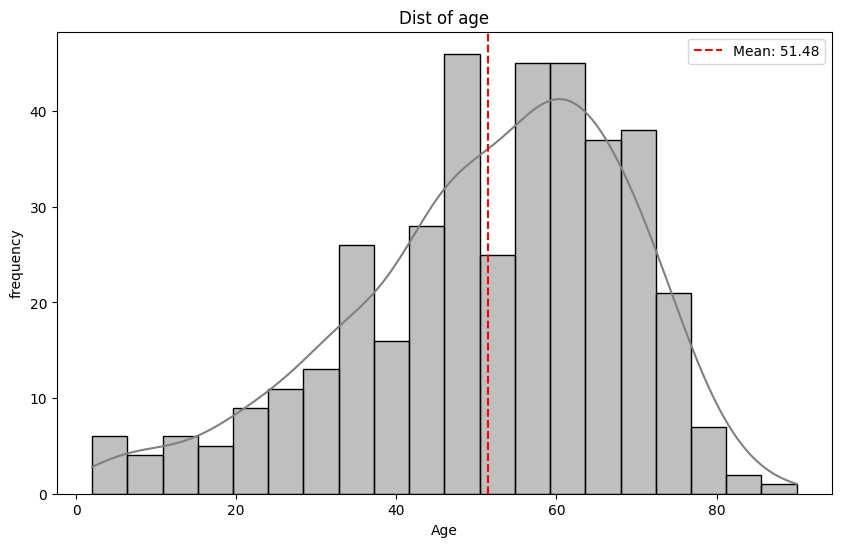

In [ ]:
plt.figure(figsize = (10, 6))
sns.histplot(df['age'].dropna(), kde = True, bins = 20, color = 'grey')
plt.title('Distribution of age')
plt.xlabel('Age')
plt.ylabel('frequency')
plt.axvline(df['age'].mean(), color='red', linestyle='--', label=f'Mean: {df['age'].mean():.2f}')
plt.legend()
plt.show()

- The age distribution is slightly left-skewed, indicating a higher concentration of older patients
- A majority of patients are in the age range of ~40-80 years, suggesting kidney disease is more prevalent in middle aged to elderly individuals in this dataset.

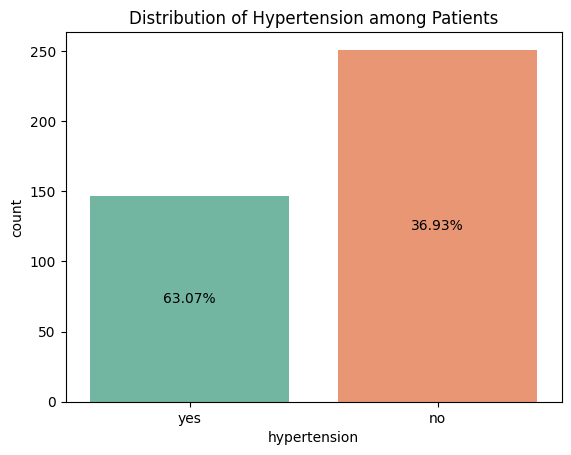

In [85]:
ax = sns.countplot(x='hypertension', data=df, palette='Set2')
plt.title("Distribution of Hypertension among Patients")
s = list(df['hypertension'].value_counts(normalize=True)*100)
for i, v in zip(ax.patches, s):
    height = i.get_height()
    ax.text(y=i.get_y()+i.get_height()/2, x=i.get_x()+i.get_width()/2, s=f'{round(v, 2)}%', ha='center', va='center')
plt.show()


- Approximately 63.07% of patients have hypertension, indicating that hypertension is a significant comorbidity among kidney disease patients in this dataset.

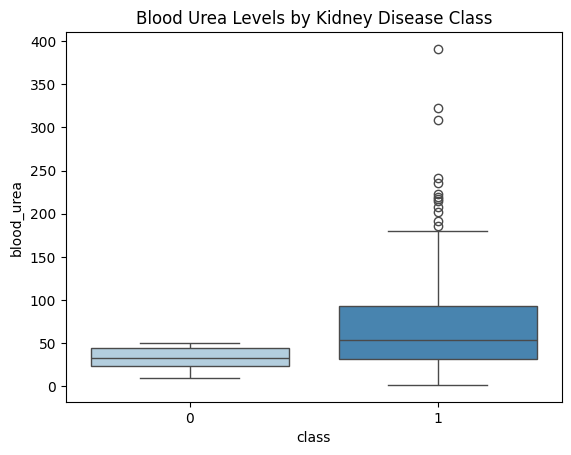

In [86]:
sns.boxplot(x='class',y='blood_urea', data=df, palette='Blues')
plt.title("Blood Urea Levels by Kidney Disease Class")
plt.show()

- Patients with chronic kidney disease (class 1) have significantly higher blood urea levels, indicated by a taller boxplot with multiple outliers.
- In contrast, non-CKD patients (class 0) show consistently low blood urea levels with a very narrow boxplot and no visible outliers.

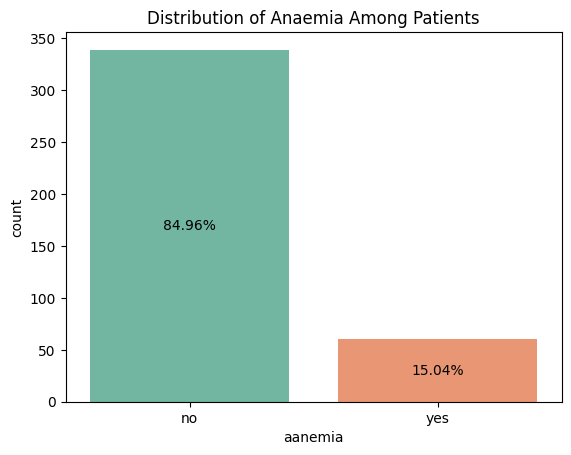

In [87]:
ax = sns.countplot(x = "aanemia", data=df, palette = 'Set2')
plt.title("Distribution of Anaemia Among Patients")
s = list(df['aanemia'].value_counts(normalize=True)*100)
for i, v in zip(ax.patches, s):
    height = i.get_height()
    ax.text(y=i.get_y()+i.get_height()/2, x=i.get_x()+i.get_width()/2, s=f'{round(v, 2)}%', ha='center', va='center')

- Approximately 85% of patients do not have anaemia, indicating that anaemia is present in only a small proportion of the dataset’s patients.

In [70]:
df['appetite'].value_counts(normalize=True)*100

appetite
good    79.448622
poor    20.551378
Name: proportion, dtype: float64

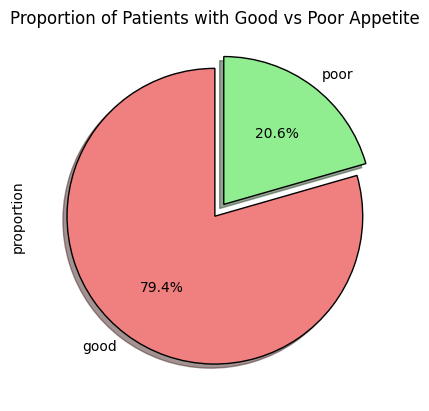

In [94]:
df['appetite'].value_counts(normalize=True).plot.pie(autopct='%1.1f%%', explode=[0,0.1], colors=["lightcoral", "lightgreen"], shadow=True, startangle=90, wedgeprops = {'edgecolor': 'black'})
plt.title("Proportion of Patients with Good vs Poor Appetite")
plt.show()

- Approximately 20.6% of patients have a poor appetite, while the majority maintain a good appetite


In [134]:
corr = df[num_cols].corr(method='spearman')
corr

,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count
age,1.000000,0.122779,-0.233408,0.212674,0.281371,0.298605,0.309019,0.349767,-0.133709,0.071979,-0.229562,-0.287210,0.161844,-0.294052
blood_pressure,0.122779,1.000000,-0.203790,0.194840,0.216760,0.177149,0.183717,0.305123,-0.136679,0.090825,-0.276048,-0.288901,0.018923,-0.268222
specific_gravity,-0.233408,-0.203790,1.000000,-0.519502,-0.333649,-0.376974,-0.343695,-0.558899,0.427856,0.058968,0.628688,0.628586,-0.220106,0.584038
albumin,0.212674,0.194840,-0.519502,1.000000,0.357782,0.372260,0.494871,0.640945,-0.534009,0.053040,-0.683325,-0.660795,0.193568,-0.624121
sugar,0.281371,0.216760,-0.333649,0.357782,1.000000,0.601981,0.222870,0.356093,-0.229266,0.054627,-0.296427,-0.304662,0.246738,-0.309882
blood_glucose_random,0.298605,0.177149,-0.376974,0.372260,0.601981,1.000000,0.195134,0.359218,-0.261038,0.071696,-0.349119,-0.350150,0.110284,-0.328447
blood_urea,0.309019,0.183717,-0.343695,0.494871,0.222870,0.195134,1.000000,0.702999,-0.413505,0.212290,-0.592166,-0.565069,0.094176,-0.565824
serum_creatinine,0.349767,0.305123,-0.558899,0.640945,0.356093,0.359218,0.702999,1.000000,-0.496777,0.128813,-0.726463,-0.719067,0.127252,-0.653615
sodium,-0.133709,-0.136679,0.427856,-0.534009,-0.229266,-0.261038,-0.413505,-0.496777,1.000000,0.020811,0.511319,0.517838,0.042592,0.443942
potassium,0.071979,0.090825,0.058968,0.053040,0.054627,0.071696,0.212290,0.128813,0.020811,1.000000,-0.063475,-0.141825,-0.086846,-0.108986


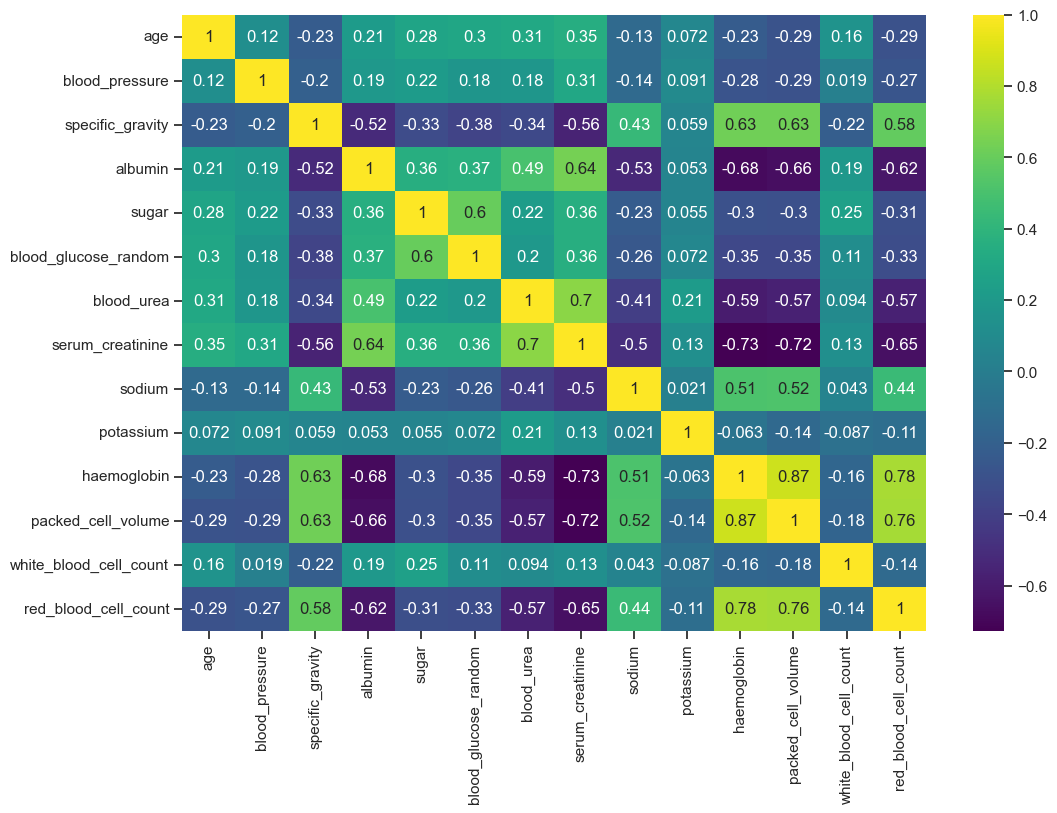

In [139]:
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap='viridis')
plt.show()

- **Serum Creatinine & Blood Urea (0.70)**  
  - Higher serum creatinine is strongly associated with increased blood urea, reflecting declining kidney filtration.

- **Haemoglobin & Packed Cell Volume (~0.87)**  
  - Packed cell volume is calculated from red cell metrics, hence very high correlation.

- **Haemoglobin & Red Blood Cell Count (~0.78)**  
  - Higher RBC count generally means higher haemoglobin.

- **Serum Creatinine & Albumin (0.64)**  
  - Elevated creatinine tends to accompany higher albumin levels in this dataset, possibly reflecting severe disease stages.

---

- **Albumin & Specific Gravity (~-0.52)**  
  - As albumin increases, specific gravity tends to decrease.

- **Serum Creatinine & Haemoglobin (~-0.73)**  
  - Higher serum creatinine (poor kidney function) is associated with lower haemoglobin (anaemia of chronic disease).

- **Serum Creatinine & Packed Cell Volume (~-0.72)**  
  - Consistent with above, reduced packed cell volume with worsening kidney function.

- **Albumin & Haemoglobin (-0.68)**  
  - Higher albumin is linked to lower haemoglobin here, indicating complex nutritional or disease interactions.

---

- **Specific Gravity & Haemoglobin (~0.63)**  
  - Possible link between concentration ability of kidneys and haemoglobin levels.

- **Blood Glucose Random & Sugar (0.60)**  
  - Direct relationship as expected since sugar levels influence random blood glucose.

---

- **NOTE: Interpretation Caution**
- These are **Spearman rank correlations**, which means they show **monotonic relationships, not necessarily linear ones**.  
- It should be remembered that **correlation does not imply causation**, so these are only associations.  
- I have integrated **domain knowledge and clinical context** to interpret these patterns, but these insights are **self-made associations based on observed data trends**, so these should be considered as **exploratory observations rather than definitive conclusions**.

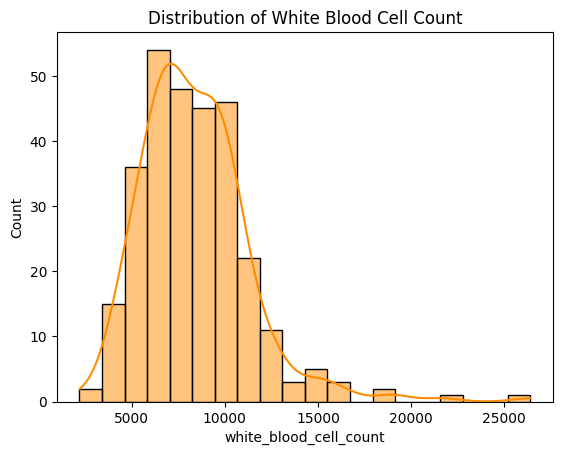

In [89]:
sns.histplot(df['white_blood_cell_count'].dropna(), kde=True, bins=20, color='darkorange')
plt.title("Distribution of White Blood Cell Count")
plt.show()

- The distribution is right-skewed (positively skewed), indicating most patients have lower to mid-range WBC counts, while fewer patients have very high counts
- Peak frequency lies approximately between 6,000 – 10,000 cells/mm³, which aligns with normal clinical WBC ranges (4,000 – 11,000 cells/mm³)
- There are noticeable outliers or tail observations beyond 15,000 cells/mm³, which could indicate:
  - Possible underlying infections or
  - Data entry/extreme measurement errors

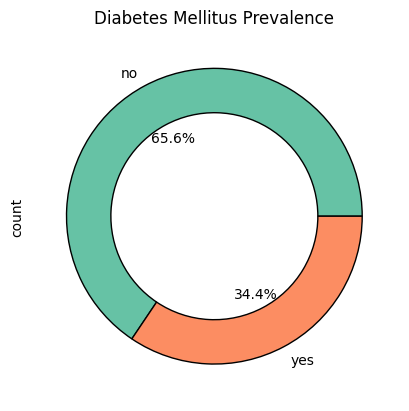

In [95]:
df['diabetes_mellitus'].value_counts().plot.pie(wedgeprops = {'edgecolor': 'black', 'width': 0.3}, autopct = "%1.1f%%", colors = ['#66c2a5', '#fc8d62'])
plt.title('Diabetes Mellitus Prevalence')
plt.show()

- In this dataset, 65.6% of patients do not have diabetes mellitus, while 34.4% do have diabetes. Although the majority are non-diabetic, the presence of diabetes in about one-third of patients indicates it is a relevant factor to observe during analysis

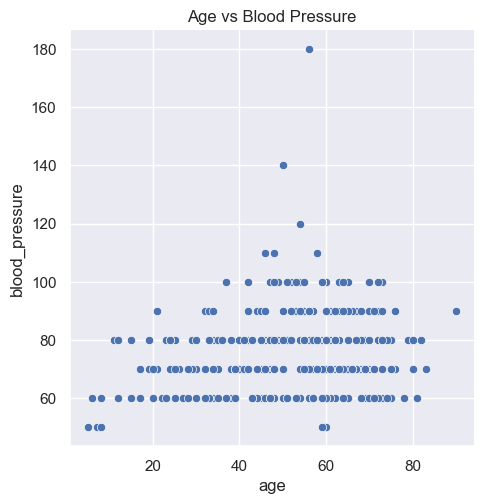

In [114]:
sns.set_theme(style = 'darkgrid')
sns.relplot(x='age',y='blood_pressure',data=df, kind='scatter')
plt.title("Age vs Blood Pressure")
plt.show()

- No strong linear relationship is visible between age and blood pressure in this dataset
- Most blood pressure readings are clustered between 60–90 mmHg, across all ages
- Blood pressure variability slightly increases with age, with some outliers in older patients showing very high blood pressure 

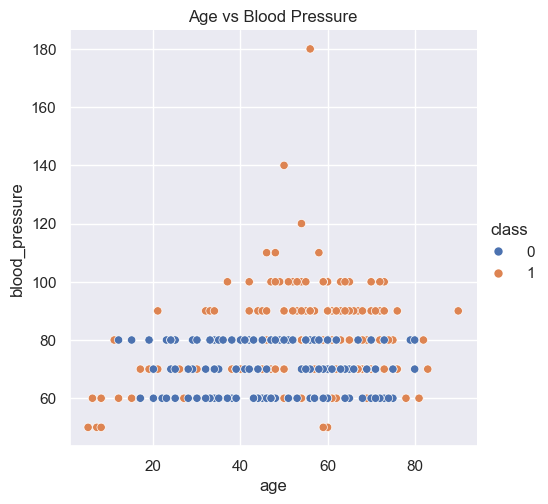

In [115]:
sns.relplot(x='age',y='blood_pressure',data=df, kind='scatter', hue='class')
plt.title("Age vs Blood Pressure")
plt.show()

- Blood pressure readings between 90–105 mmHg are entirely class 1 patients (CKD). This suggests higher blood pressure is associated with chronic kidney disease in this dataset.
- Patients with blood pressure below ~90 mmHg are mostly class 0 (non-CKD), but there is still a small proportion of class 1 within this lower BP group.
- Overall, class 1 patients appear across a wide BP range, but are more concentrated at higher blood pressure values.

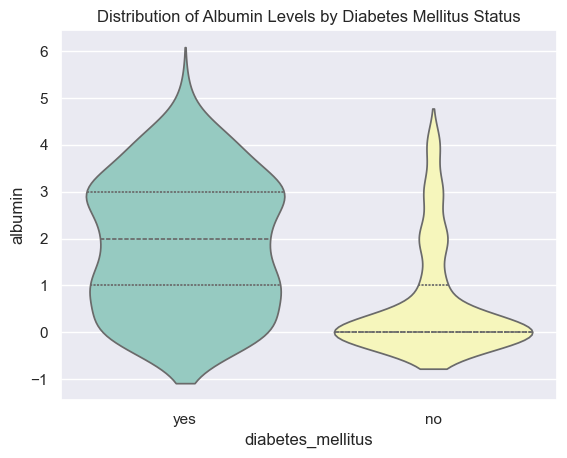

In [116]:
sns.violinplot(x = 'diabetes_mellitus', y = 'albumin', data=df, inner = 'quartile', palette='Set3')
plt.title('Distribution of Albumin Levels by Diabetes Mellitus Status')
plt.show()

- Patients with diabetes mellitus tend to have higher albumin levels, as shown by the wider and higher distribution in the violin plot
- In contrast, non-diabetic patients mostly have albumin levels near zero, indicating minimal albumin presence

In [112]:
pd.crosstab(df['diabetes_mellitus'], df['hypertension'])

hypertension,no,yes
diabetes_mellitus,,
no,220,41
yes,31,106


<Axes: xlabel='diabetes_mellitus'>

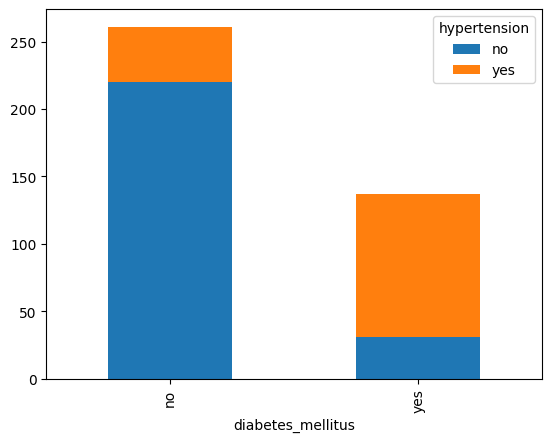

In [111]:
diabetes_hypertension = pd.crosstab(df['diabetes_mellitus'], df['hypertension'])
diabetes_hypertension.plot(kind = 'bar', stacked = True)

- Among diabetic patients, hypertension is highly prevalent, with a majority showing hypertension.

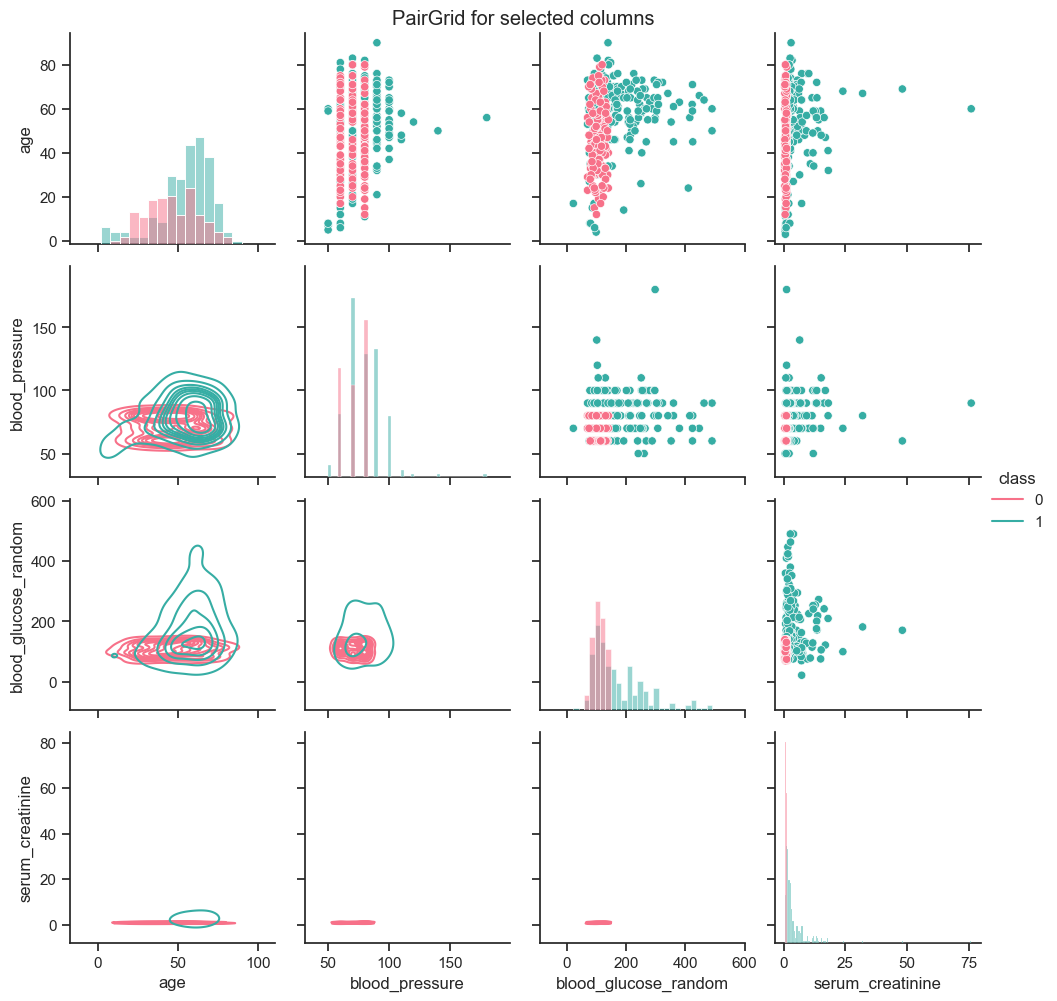

In [133]:
sns.set_theme(style='ticks')

cols = ['age', 'blood_pressure', 'blood_glucose_random', 'serum_creatinine', 'class']
g = sns.PairGrid(df[cols], hue='class', palette='husl')


g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot, cmap='Blues_d')
g.map_diag(sns.histplot)

g.add_legend()
plt.suptitle("PairGrid for selected columns", y=1)  
plt.show()


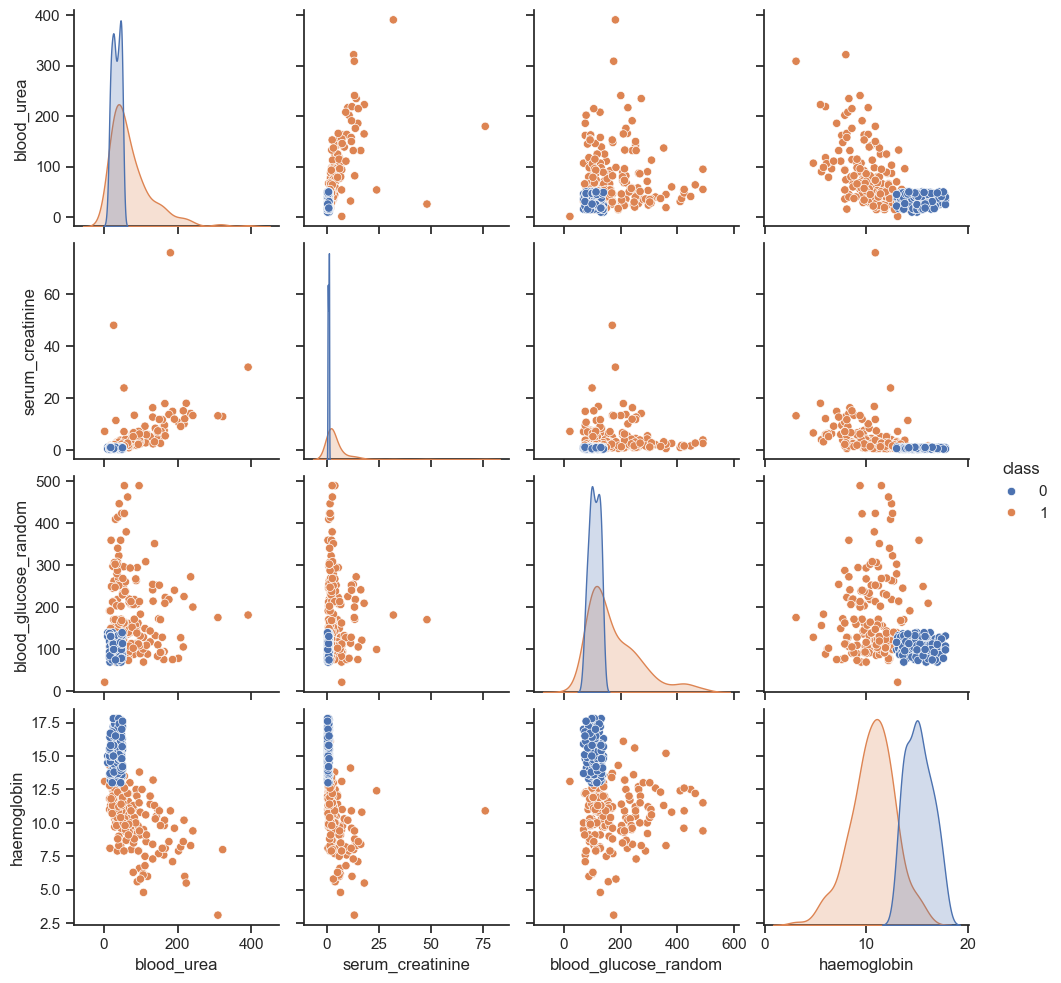

In [149]:
sns.pairplot(df, vars=['blood_urea', 'serum_creatinine', 'blood_glucose_random', 'haemoglobin'], hue='class')
plt.show()

##### **Interactive plot for dynamic exploration of variables.**

In [141]:
fig = px.scatter(df, x = 'age', y = 'blood_pressure', color = 'class', hover_data=['serum_creatinine', 'haemoglobin'], title = "Age vs Blood Pressure (Colored by Class) with Creatinine & Haemoglobin Info")
fig.show()

In [143]:
fig = px.scatter_3d(df, x = 'age', y = 'blood_pressure', z = 'serum_creatinine', color = 'class', title ="3D Scatter Plot of Age, Blood Pressure, and Serum Creatinine by Class")
fig.show()

In [146]:
fig = go.Figure(data= go.Heatmap(x = corr.columns, y = corr.index, z = corr.values))
fig.show()

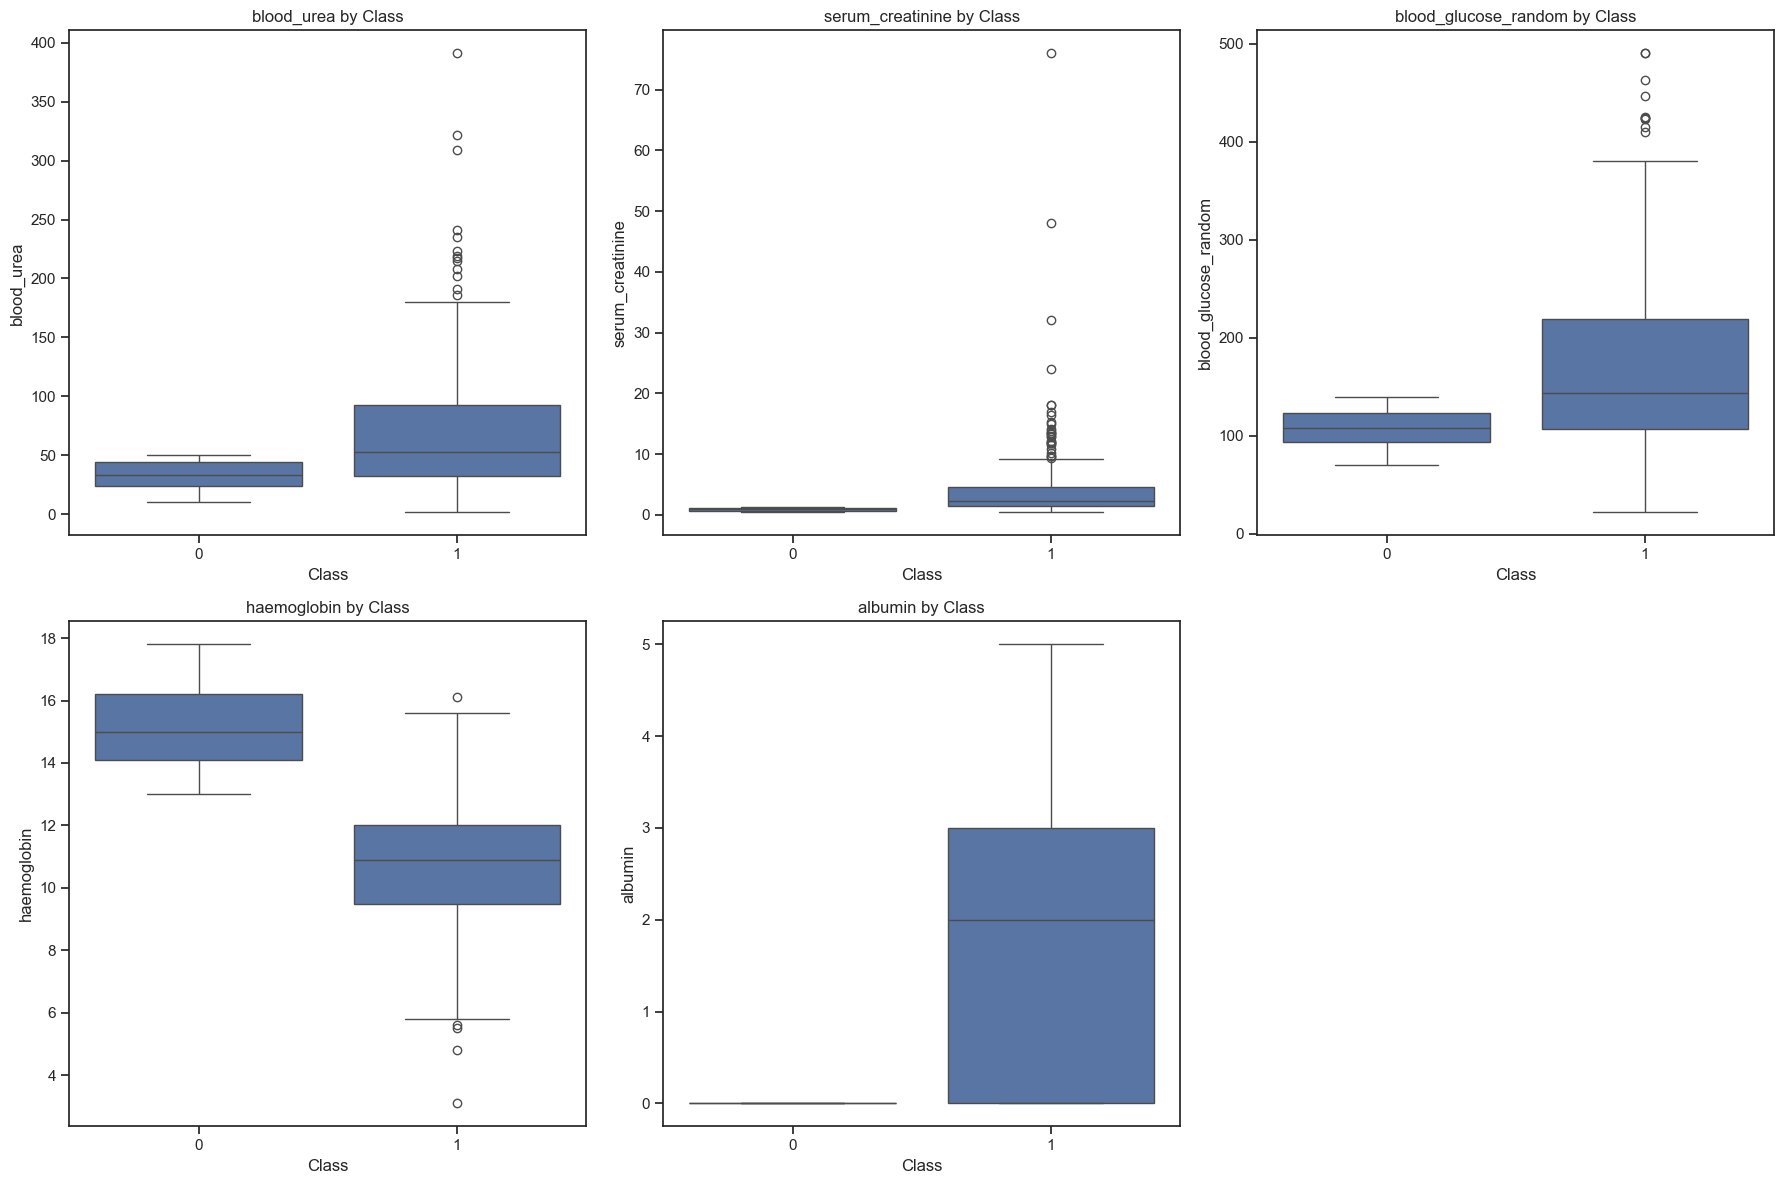

In [ ]:
# Boxplots of Key Lab Values vs Class
key_columns = ['blood_urea', 'serum_creatinine', 'blood_glucose_random', 'haemoglobin', 'albumin']

plt.figure(figsize=(18,12))
for i, col in enumerate(key_columns, 1):
    plt.subplot(2, 3, i)  # 2 rows, 3 columns, position i
    sns.boxplot(x='class', y=col, data=df)
    plt.title(f'{col} by Class')
    plt.xlabel('Class')
    plt.ylabel(col)

plt.tight_layout()
plt.show()



- **1. Blood Urea**
    - Higher median and presence of outliers in class 1 indicates reduced kidney filtration in diseased patients.

- **2. Serum Creatinine**
    - Significantly higher values in class 1, making it a strong indicator of kidney disease severity.

- **3. Blood Glucose Random**
    - Slightly higher with more outliers in class 1, suggesting diabetic kidney complications.

- **4. Haemoglobin**
    - Lower levels in class 1, showing anemia prevalence in kidney disease.

- **5. Albumin**
    - Higher and more spread in class 1, indicating albuminuria association with kidney disease while Non-CKD patients generally show albumin levels close to zero, suggesting very little albumin is present in their urine.
---
